In [2]:
prixlogement=pd.read_excel(r'c:\Users\ARMIDE Informatique\Downloads\donne_immobilier.xlsx')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  120 non-null    int64  
 1   indice_prix_logement_lissé  120 non-null    int64  
 2   volume_transaction          120 non-null    int64  
 3   taux_occupation             120 non-null    int64  
 4   taux_prix_logement          120 non-null    float64
 5   taux_volume_transaction     120 non-null    float64
 6   indice_prix_logement        120 non-null    int64  
 7   date                        120 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 7.6 KB


0

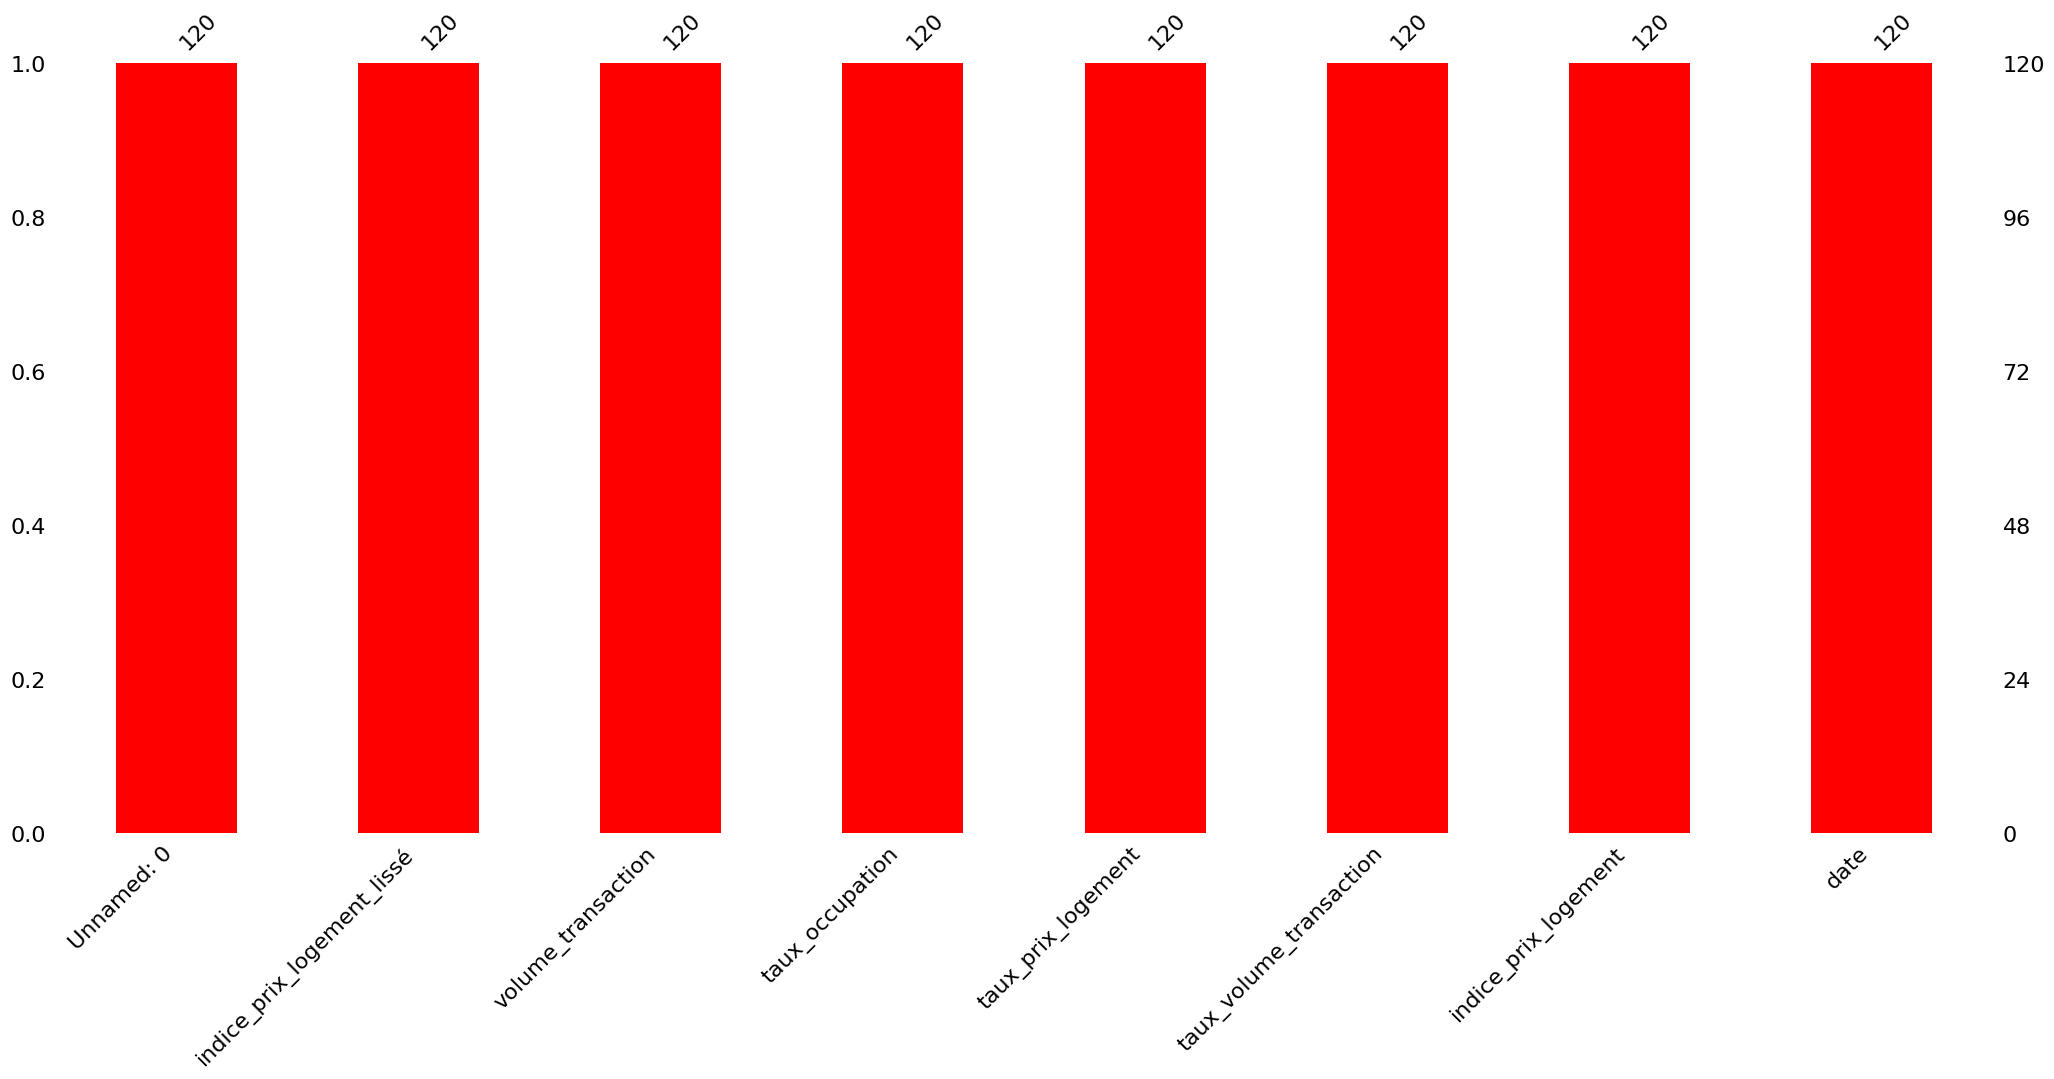

In [3]:
# affichier les  cinq premières et dernières lignes de la base de données 
prixlogement.head()
prixlogement.tail()
prixlogement.info() #récupérer les informations sur la base de données 
msno.bar(prixlogement, color='red') #afficher le nombre d'observations de chaque variable
check_duplicated = prixlogement.duplicated().sum()
check_duplicated# afficher les doublons

In [11]:
#vérifier la présence des outliers
Q1 = prixlogement.quantile(0.25)
Q3 = prixlogement.quantile(0.75)
IQR = Q3 - Q1

# Afficher Q1, Q3, et IQR
print(f"Q1:\n{Q1}\n")
print(f"Q3:\n{Q3}\n")
print(f"IQR:\n{IQR}\n")

# Détecter les valeurs aberrantes
outliers = ((prixlogement < (Q1 - 1.5 * IQR)) | (prixlogement > (Q3 + 1.5 * IQR)))
print(outliers)

# Afficher les valeurs aberrantes
outliers_data = prixlogement[outliers.any(axis=1)]
print(outliers_data)


Q1:
Unnamed: 0                      29.750000
indice_prix_logement_lissé      17.000000
volume_transaction               6.750000
taux_occupation                 76.000000
taux_prix_logement               0.224817
taux_volume_transaction          0.330167
indice_prix_logement           148.000000
date                          2005.000000
Name: 0.25, dtype: float64

Q3:
Unnamed: 0                      89.250000
indice_prix_logement_lissé      27.250000
volume_transaction              12.000000
taux_occupation                 89.000000
taux_prix_logement               0.273903
taux_volume_transaction          0.496315
indice_prix_logement           202.250000
date                          2014.000000
Name: 0.75, dtype: float64

IQR:
Unnamed: 0                    59.500000
indice_prix_logement_lissé    10.250000
volume_transaction             5.250000
taux_occupation               13.000000
taux_prix_logement             0.049086
taux_volume_transaction        0.166148
indice_prix_logemen

In [12]:
# Détecter les valeurs aberrantes
outliers = ((prixlogement < (Q1 - 1.5 * IQR)) | (prixlogement > (Q3 + 1.5 * IQR)))
print(outliers)

# Afficher les valeurs aberrantes
outliers_data = prixlogement[outliers.any(axis=1)]
print(outliers_data)


     Unnamed: 0  indice_prix_logement_lissé  volume_transaction  \
0         False                       False               False   
1         False                       False               False   
2         False                       False               False   
3         False                       False               False   
4         False                       False               False   
..          ...                         ...                 ...   
115       False                       False               False   
116       False                       False               False   
117       False                       False               False   
118       False                       False               False   
119       False                       False               False   

     taux_occupation  taux_prix_logement  taux_volume_transaction  \
0              False               False                    False   
1              False               False                 

In [13]:
print(f"IQR:\n{IQR}\n")


IQR:
Unnamed: 0                    59.500000
indice_prix_logement_lissé    10.250000
volume_transaction             5.250000
taux_occupation               13.000000
taux_prix_logement             0.049086
taux_volume_transaction        0.166148
indice_prix_logement          54.250000
date                           9.000000
dtype: float64



In [14]:
# Calculer les seuils
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Afficher les seuils
print(f"Seuil inférieur:\n{lower_bound}\n")
print(f"Seuil supérieur:\n{upper_bound}\n")

Seuil inférieur:
Unnamed: 0                     -59.500000
indice_prix_logement_lissé       1.625000
volume_transaction              -1.125000
taux_occupation                 56.500000
taux_prix_logement               0.151188
taux_volume_transaction          0.080945
indice_prix_logement            66.625000
date                          1991.500000
dtype: float64

Seuil supérieur:
Unnamed: 0                     178.500000
indice_prix_logement_lissé      42.625000
volume_transaction              19.875000
taux_occupation                108.500000
taux_prix_logement               0.347532
taux_volume_transaction          0.745537
indice_prix_logement           283.625000
date                          2027.500000
dtype: float64



In [15]:
# Vérifier les valeurs aberrantes
outliers = ((prixlogement < lower_bound) | (prixlogement > upper_bound))

# Afficher le résultat
print(outliers)

     Unnamed: 0  indice_prix_logement_lissé  volume_transaction  \
0         False                       False               False   
1         False                       False               False   
2         False                       False               False   
3         False                       False               False   
4         False                       False               False   
..          ...                         ...                 ...   
115       False                       False               False   
116       False                       False               False   
117       False                       False               False   
118       False                       False               False   
119       False                       False               False   

     taux_occupation  taux_prix_logement  taux_volume_transaction  \
0              False               False                    False   
1              False               False                 

In [16]:
prixlogement.columns

Index(['Unnamed: 0', 'indice_prix_logement_lissé', 'volume_transaction',
       'taux_occupation', 'taux_prix_logement', 'taux_volume_transaction',
       'indice_prix_logement', 'date'],
      dtype='object')

In [17]:
prixlogement=prixlogement.drop(columns=['Unnamed: 0','date'])

In [18]:
prixlogement

,indice_prix_logement_lissé,volume_transaction,taux_occupation,taux_prix_logement,taux_volume_transaction,indice_prix_logement
0,22,2,89,0.238240,0.352847,227
1,12,13,94,0.219451,0.376861,141
2,20,8,81,0.249122,0.379391,148
3,21,12,72,0.229181,0.321599,193
4,27,3,92,0.222357,0.414931,193
...,...,...,...,...,...,...
115,32,13,86,0.292428,0.296464,229
116,24,9,86,0.253641,0.467561,122
117,30,13,92,0.286036,0.401353,206
118,12,9,92,0.200535,0.341140,220


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
prixlogement.columns

Index(['indice_prix_logement_lissé', 'volume_transaction', 'taux_occupation',
       'taux_prix_logement', 'taux_volume_transaction',
       'indice_prix_logement'],
      dtype='object')

In [21]:
# statistiques descriptives
statprixlogement=prixlogement.describe()
statprixlogement

,indice_prix_logement_lissé,volume_transaction,taux_occupation,taux_prix_logement,taux_volume_transaction,indice_prix_logement
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,21.950000,8.908333,82.533333,0.249323,0.414598,175.350000
std,6.334977,3.768502,7.585849,0.028339,0.106911,31.776967
min,12.000000,2.000000,70.000000,0.200035,0.206257,122.000000
25%,17.000000,6.750000,76.000000,0.224817,0.330167,148.000000
50%,20.500000,9.000000,83.000000,0.251477,0.416029,174.000000
75%,27.250000,12.000000,89.000000,0.273903,0.496315,202.250000
max,33.000000,15.000000,94.000000,0.297436,0.599917,229.000000


<Axes: >

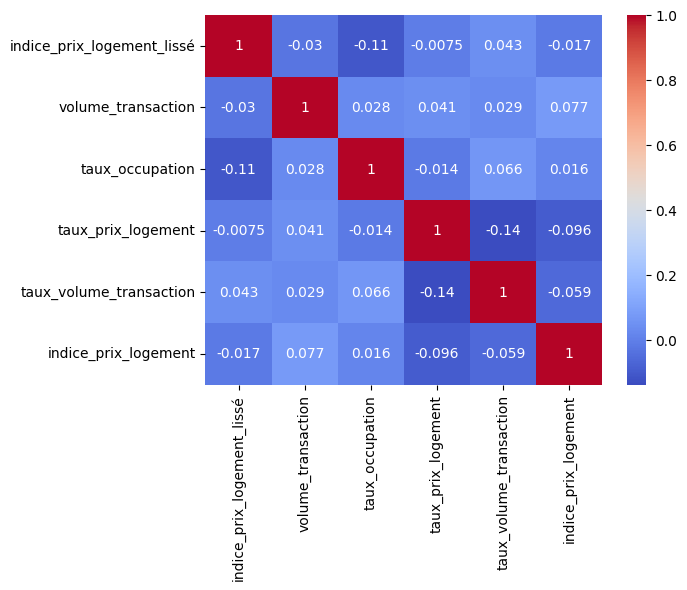

In [22]:
corrprixlogement = prixlogement.corr()
sns.heatmap(corrprixlogement, annot= True, cmap='coolwarm') # visualisation graphique de la matrice de corrélation

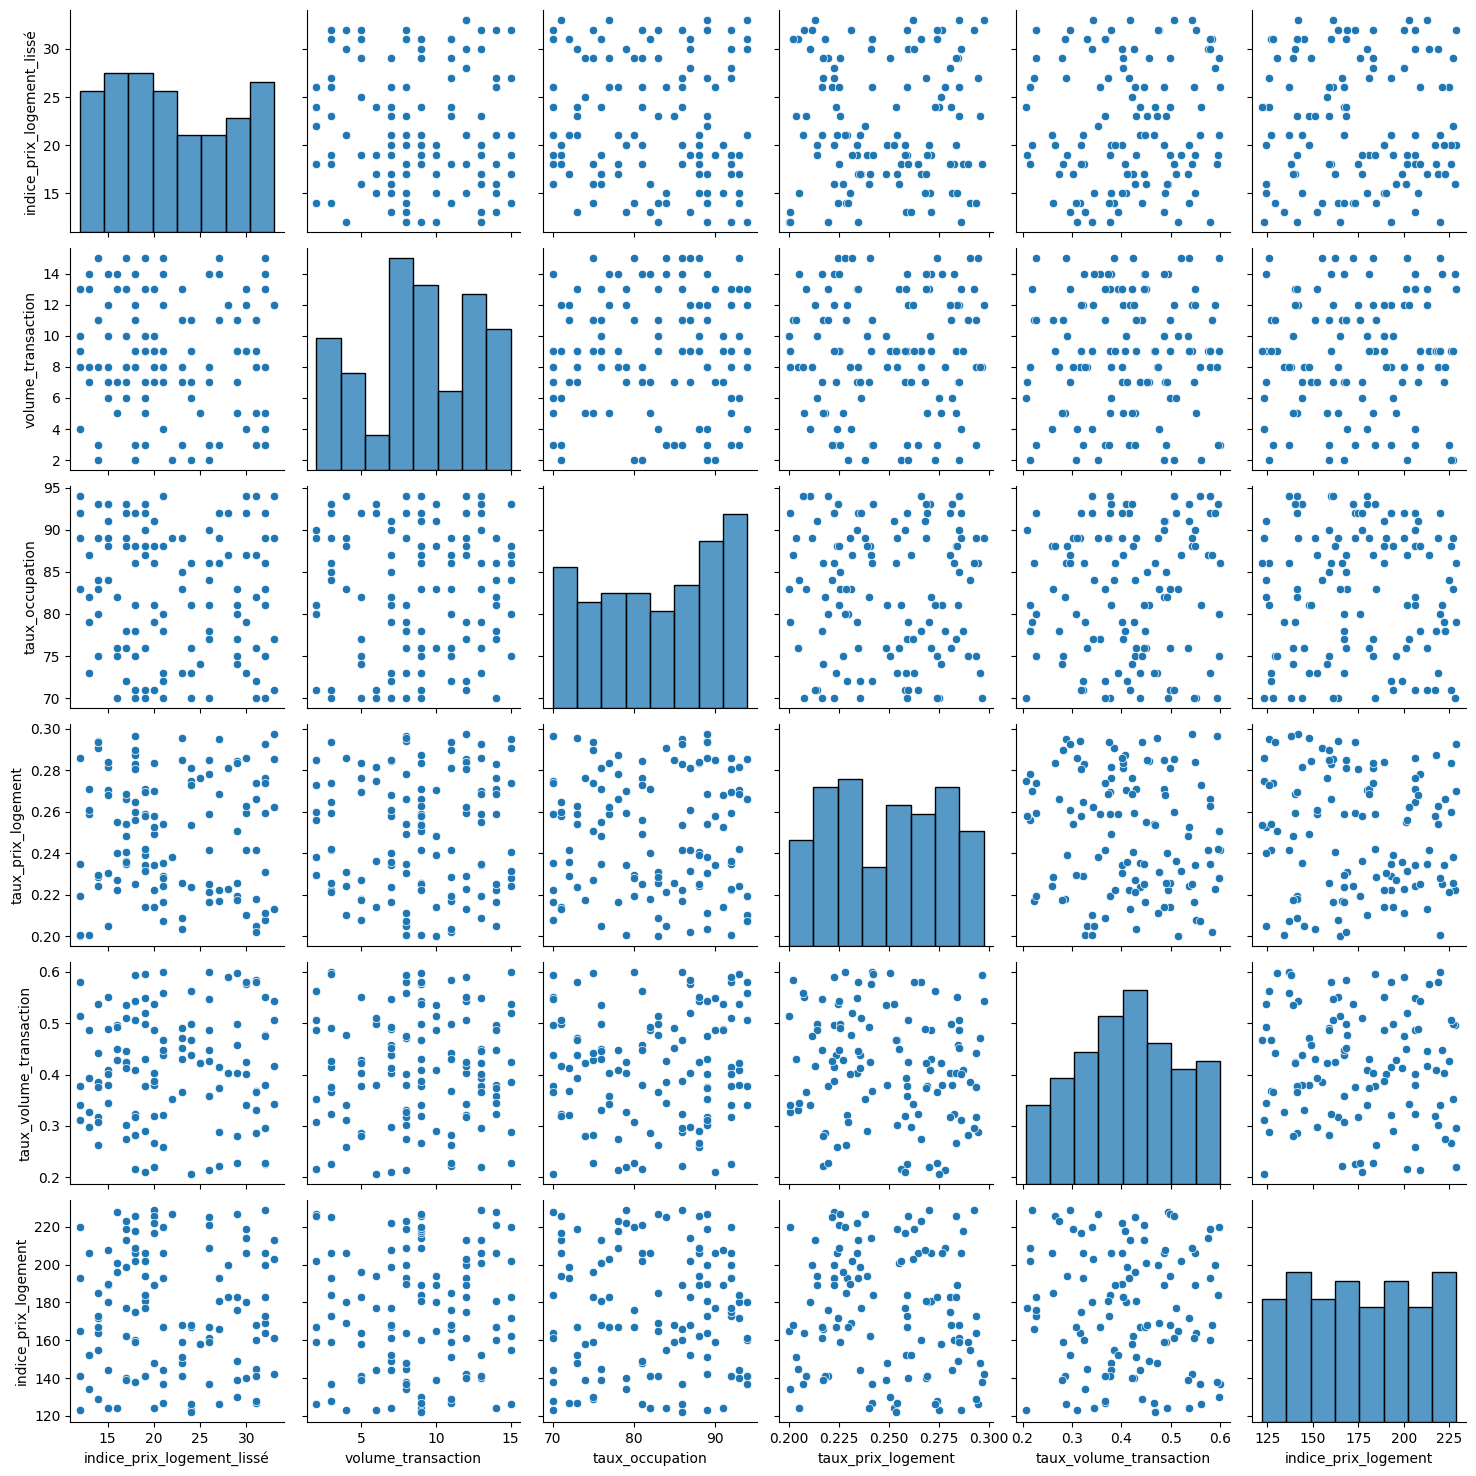

In [23]:
sns.pairplot(prixlogement) # visualisation graphique des données

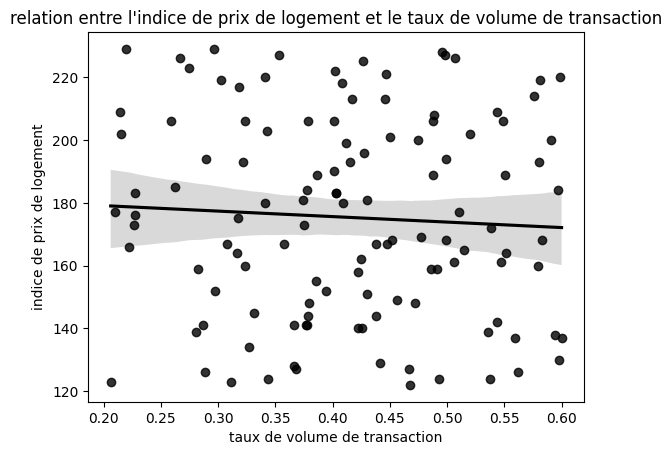

In [24]:
sns.regplot(data=prixlogement, x='taux_volume_transaction', y='indice_prix_logement', color='black')
plt.title('relation entre l\'indice de prix de logement et le taux de volume de transaction')
plt.xlabel('taux de volume de transaction')
plt.ylabel("indice de prix de logement")
plt.show()

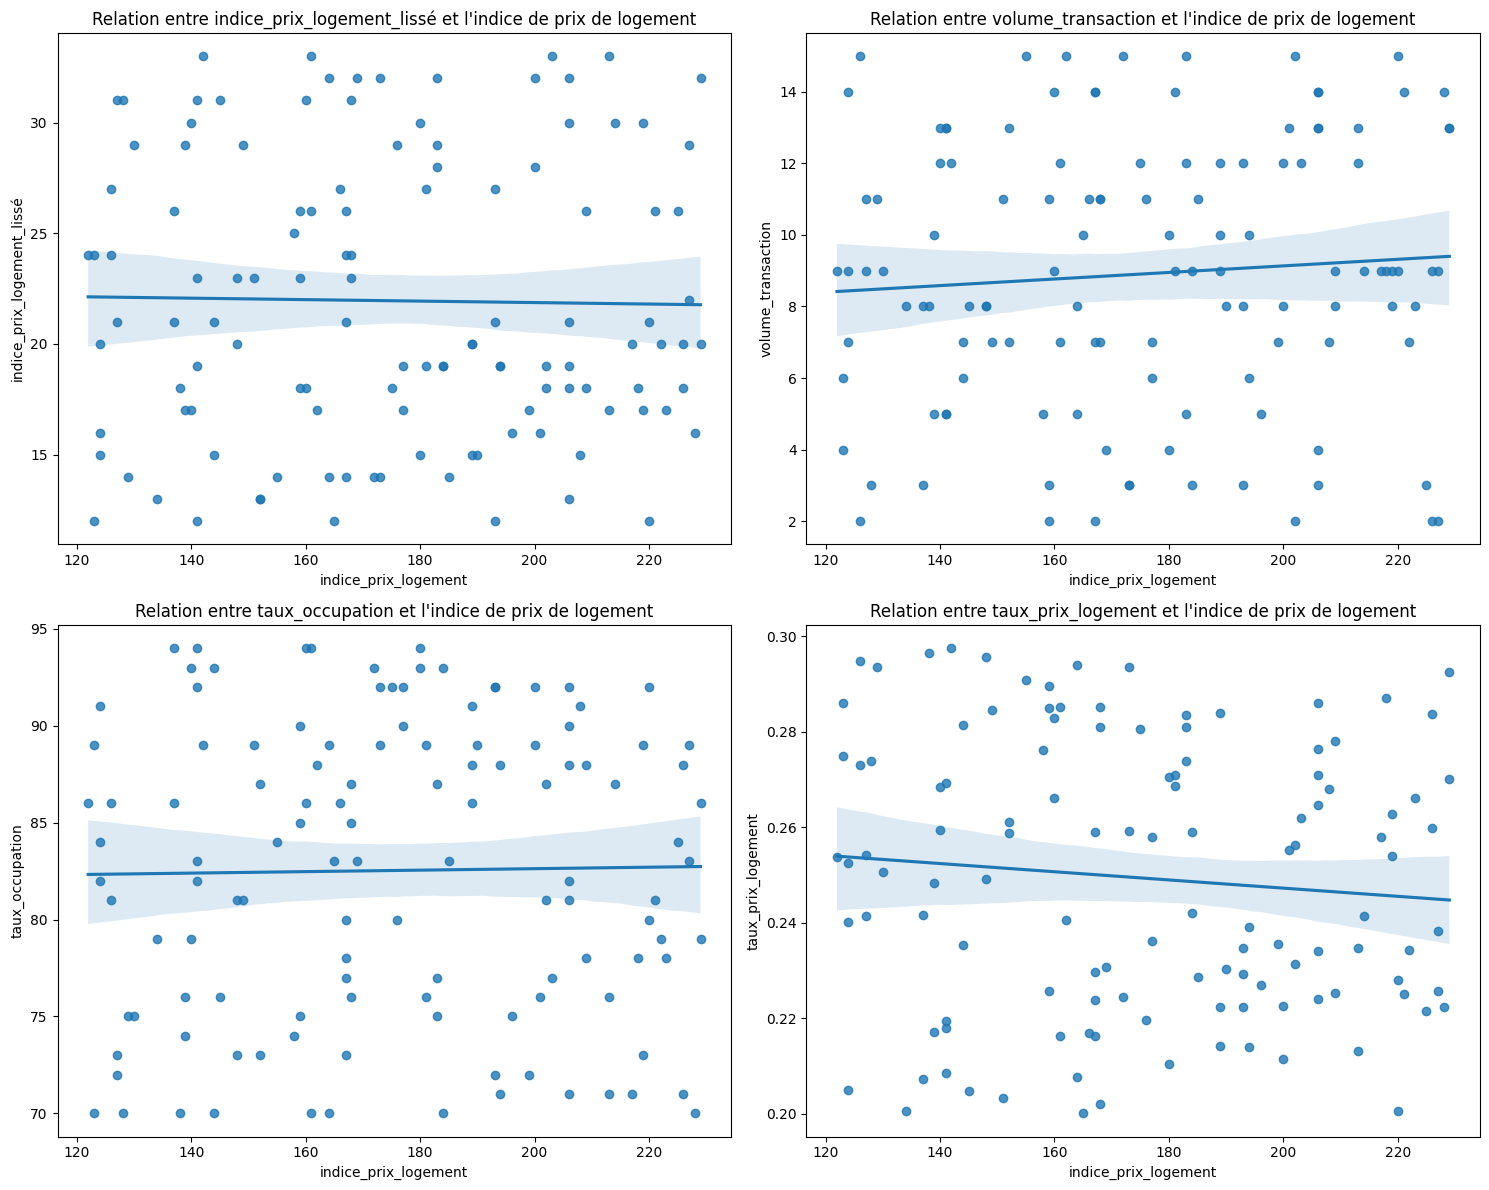

In [26]:
variables =['indice_prix_logement_lissé', 'volume_transaction', 'taux_occupation',
'taux_prix_logement', 'taux_volume_transaction']

# Création de la figure et des axes
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Tracé des box plots sur chaque sous-graphe
for ax, var in zip(axes.flatten(), variables):
    sns.regplot(x='indice_prix_logement', y=var, data=prixlogement, ax=ax)
    ax.set_title(f'Relation entre {var} et l\'indice de prix de logement')

# Ajustement de l'espacement entre les sous-graphes
plt.tight_layout()
plt.show()

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [28]:
# Normalisation
min_max_scaler = MinMaxScaler()
data_normalized = prixlogement.copy()
data_normalized[variables] = min_max_scaler.fit_transform(prixlogement[variables])

# Afficher les données normalisées
print("Données normalisées :")
print(data_normalized.head())

Données normalisées :
   indice_prix_logement_lissé  volume_transaction  taux_occupation  \
0                    0.476190            0.000000         0.791667   
1                    0.000000            0.846154         1.000000   
2                    0.380952            0.461538         0.458333   
3                    0.428571            0.769231         0.083333   
4                    0.714286            0.076923         0.916667   

   taux_prix_logement  taux_volume_transaction  indice_prix_logement  
0            0.392239                 0.372376                   227  
1            0.199334                 0.433380                   141  
2            0.503964                 0.439806                   148  
3            0.299233                 0.292998                   193  
4            0.229175                 0.530088                   193  


In [29]:
# Standardisation
standard_scaler = StandardScaler()
data_standardized = prixlogement.copy()
data_standardized[variables] = standard_scaler.fit_transform(prixlogement[variables])

# Afficher les données standardisées
print("Données standardisées :")
print(data_standardized.head())

Données standardisées :
   indice_prix_logement_lissé  volume_transaction  taux_occupation  \
0                    0.007926           -1.840864         0.856039   
1                   -1.577231            1.090306         1.517924   
2                   -0.309105           -0.242044        -0.202978   
3                   -0.150590            0.823836        -1.394372   
4                    0.800504           -1.574394         1.253170   

   taux_prix_logement  taux_volume_transaction  indice_prix_logement  
0           -0.392708                -0.580023                   227  
1           -1.058494                -0.354455                   141  
2           -0.007106                -0.330693                   148  
3           -0.713706                -0.873527                   193  
4           -0.955500                 0.003129                   193  


In [31]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


In [34]:
x = data_normalized.drop(columns=['indice_prix_logement']) # les prédicteurs
y= data_normalized['indice_prix_logement'] #variable à prédire

#division des données normalisées en sous-ensemble d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=808)

# Ajout des constants
x_train_const= sm.add_constant(x_train)
x_test_const= sm.add_constant(x_test)

# entraînement du modèle
model = sm.OLS(y_train, x_train_const).fit()
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     indice_prix_logement   R-squared:                       0.025
Model:                              OLS   Adj. R-squared:                 -0.029
Method:                   Least Squares   F-statistic:                    0.4599
Date:                  Sat, 29 Jun 2024   Prob (F-statistic):              0.805
Time:                          00:34:58   Log-Likelihood:                -467.60
No. Observations:                    96   AIC:                             947.2
Df Residuals:                        90   BIC:                             962.6
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------


In [36]:
from statsmodels.stats.diagnostic import het_breuschpagan


In [37]:
# prédiction
y_pred = model.predict(x_test_const)

# residus
residuals= y_test- y_pred

# test d'homoscédastiticité
lm_statistic, p_value_lm, f_statistic, p_value_f = het_breuschpagan(residuals, x_test_const)
# afficher les résultats
print("LM Statistic: ", lm_statistic)
print("LM p-value: ", p_value_lm)
print("F-statisitic", f_statistic)
print("F p-value", p_value_f)

LM Statistic:  4.92597809198729
LM p-value:  0.4249806297630345
F-statisitic 0.9297211262877213
F p-value 0.4848821440297838


In [38]:
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro

In [39]:
# test d'autocorrélation des résuidus
durbin_watson_statistic=durbin_watson(residuals)
print("Statistic Durbin watson",durbin_watson_statistic)

# test de normalité des résidus
shapiro_statistic, p_value_shapiro = shapiro(residuals)


Statistic Durbin watson 0.8929036198362352


In [41]:
p_value_shapiro

0.8316516280174255

In [42]:
# évaluation de la performance prédictive
print("RMSE",mean_absolute_percentage_error(y_test, y_pred))
print("MAE",mean_absolute_error(y_test, y_pred))

RMSE 0.18811836327672501
MAE 26.86961172329065


In [43]:
# Préparation des données normalisées pour l'entraînement et l'évaluation prédicitve
x = data_standardized.drop(columns=['indice_prix_logement']) # les prédicteurs
y= data_normalized['indice_prix_logement'] #variable à prédire

#division des données normalisées en sous-ensemble d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=808)

# Ajout des constants
x_train_const= sm.add_constant(x_train)
x_test_const= sm.add_constant(x_test)

# entraînement du modèle
model = sm.OLS(y_train, x_train_const).fit()
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     indice_prix_logement   R-squared:                       0.025
Model:                              OLS   Adj. R-squared:                 -0.029
Method:                   Least Squares   F-statistic:                    0.4599
Date:                  Sat, 29 Jun 2024   Prob (F-statistic):              0.805
Time:                          01:09:28   Log-Likelihood:                -467.60
No. Observations:                    96   AIC:                             947.2
Df Residuals:                        90   BIC:                             962.6
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------


In [45]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

In [46]:
import numpy as np

In [50]:
# Définir une fonction pour calculer le RMSE
# Définir une fonction pour calculer le RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Créer un scorer RMSE pour la validation croisée
rmse_scorer = make_scorer(rmse, greater_is_better=False)


# Modèles à tester
models = {
    'Linear Regression': sm.OLS(y_train, x_train_const),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=808)
}

# Evaluation des modèles
# Evaluation des modèles
print("Évaluation des modèles sur données normalisées:")
for name, model in models.items():
    if name == 'Linear Regression':
        results = model.fit().predict(x_test_const)
        score = rmse(y_test, results)
    else:
        model.fit(x_train_const, y_train)
        y_pred = model.predict(x_test_const)
        score = rmse(y_test, y_pred)
    print(f"{name}: RMSE = {score:.4f}")

Évaluation des modèles sur données normalisées:
Linear Regression: RMSE = 32.0044
Ridge Regression: RMSE = 31.9974
Lasso Regression: RMSE = 31.7683
Random Forest: RMSE = 29.5147


In [52]:
# Définir le modèle de forêt aléatoire
model_rf = RandomForestRegressor(random_state=808)

# Définir les hyperparamètres à optimiser
param_grid = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres dans la forêt
    'max_depth': [None, 10, 20, 30],  # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10]  # Nombre minimum d'échantillons requis pour scinder un nœud
}

# Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
grid_search.fit(x_train_const, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres trouvés :")
print(grid_search.best_params_)

# Obtenez le meilleur modèle
best_model_rf = grid_search.best_estimator_
print(best_model_rf)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Meilleurs hyperparamètres trouvés :
{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
RandomForestRegressor(min_samples_split=10, n_estimators=50, random_state=808)


In [53]:
# Définir la validation croisée (par exemple, K-Fold avec K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=808)

# Liste pour stocker les résultats de la validation croisée
cv_results = []

# Effectuer la validation croisée
for train_index, val_index in kf.split(x_train_const):
    x_train_fold, x_val_fold = x_train_const.iloc[train_index], x_train_const.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Entraîner le meilleur modèle sur le pli actuel
    best_model_rf.fit(x_train_fold, y_train_fold)
    
    # Faire des prédictions sur l'ensemble de validation
    y_pred_fold = best_model_rf.predict(x_val_fold)
    
    # Calculer l'erreur quadratique moyenne sur l'ensemble de validation
    fold_rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred_fold))
    cv_results.append(fold_rmse)

# Calculer la moyenne et l'écart-type des résultats de validation croisée
mean_cv_rmse = np.mean(cv_results)
std_cv_rmse = np.std(cv_results)

print(f"Validation croisée RMSE moyenne : {mean_cv_rmse:.4f} +/- {std_cv_rmse:.4f}")

Validation croisée RMSE moyenne : 34.6385 +/- 3.5851
